In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = {
	'Режим работы': ['Симметричный', 'Несимметричный', 'Несимметричный', 'Включение'],
	"Uan": [8.78, 8.78, 8.68, 8.89],
	"Ubn": [8.78, 8.76, 8.71, 8.75],
	"Ucn": [8.98, 8.82, 8.81, 8.73],
	"Ia": [88, 2, 55, 63],
	"Ib": [86, 122, 130, 133],
	"Ic": [88, 85, 88, 1],
	"In": [1, 104, 61, 114],
}

df = pd.DataFrame(data)
df

,Режим работы,Uan,Ubn,Ucn,Ia,Ib,Ic,In
0,Симметричный,8.78,8.78,8.98,88,86,88,1
1,Несимметричный,8.78,8.76,8.82,2,122,85,104
2,Несимметричный,8.68,8.71,8.81,55,130,88,61
3,Включение,8.89,8.75,8.73,63,133,1,114


In [12]:
data_2 = {
    "Режим работы": ['Симметричный', 'Несимметричный'],
    "Uan": [8.78, 8.81],
    "Ubn": [8.77, 8.76],
    "Ucn": [8.79, 8.78],
    "Ia": [96, 69],
    "Ib": [93, 103],
    "Ic": [94, 87],
}

df_2 = pd.DataFrame(data_2)
df_2


,Режим работы,Uan,Ubn,Ucn,Ia,Ib,Ic
0,Симметричный,8.78,8.77,8.79,96,93,94
1,Несимметричный,8.81,8.76,8.78,69,103,87


In [13]:
import pandas as pd
import numpy as np

data = {
    'Режим работы': ['Симметричный', 'Несимметричный', 'Несимметричный', 'Включение'],
    "Uan": [8.78, 8.78, 8.68, 8.89],
    "Ubn": [8.78, 8.76, 8.71, 8.75],
    "Ucn": [8.98, 8.82, 8.81, 8.73],
    "Ia": [88, 2, 55, 63],
    "Ib": [86, 122, 130, 133],
    "Ic": [88, 85, 88, 1],
    "In": [1, 104, 61, 114],
}

df = pd.DataFrame(data)

# Углы в градусах
angles = [0, 120, 240]  # Углы для векторов A, B, C

# Вычисление длины векторов и углов
results = []
for index, row in df.iterrows():
    for i, phase in enumerate(['A', 'B', 'C']):
        U = row[f'U{phase.lower()}n']
        I = row[f'I{phase.lower()}']
        angle = angles[i]
        results.append({
            'Режим работы': row['Режим работы'],
            'Фаза': phase,
            'U': U,
            'I': I,
            'Angle (°)': angle,
            'Length': np.sqrt(U**2 + I**2)  # длина вектора
        })

results_df = pd.DataFrame(results)
print(results_df)

      Режим работы Фаза     U    I  Angle (°)      Length
0     Симметричный    A  8.78   88          0   88.436918
1     Симметричный    B  8.78   86        120   86.447027
2     Симметричный    C  8.98   88        240   88.456997
3   Несимметричный    A  8.78    2          0    9.004910
4   Несимметричный    B  8.76  122        120  122.314094
5   Несимметричный    C  8.82   85        240   85.456377
6   Несимметричный    A  8.68   55          0   55.680718
7   Несимметричный    B  8.71  130        120  130.291458
8   Несимметричный    C  8.81   88        240   88.439901
9        Включение    A  8.89   63          0   63.624147
10       Включение    B  8.75  133        120  133.287518
11       Включение    C  8.73    1        240    8.787087


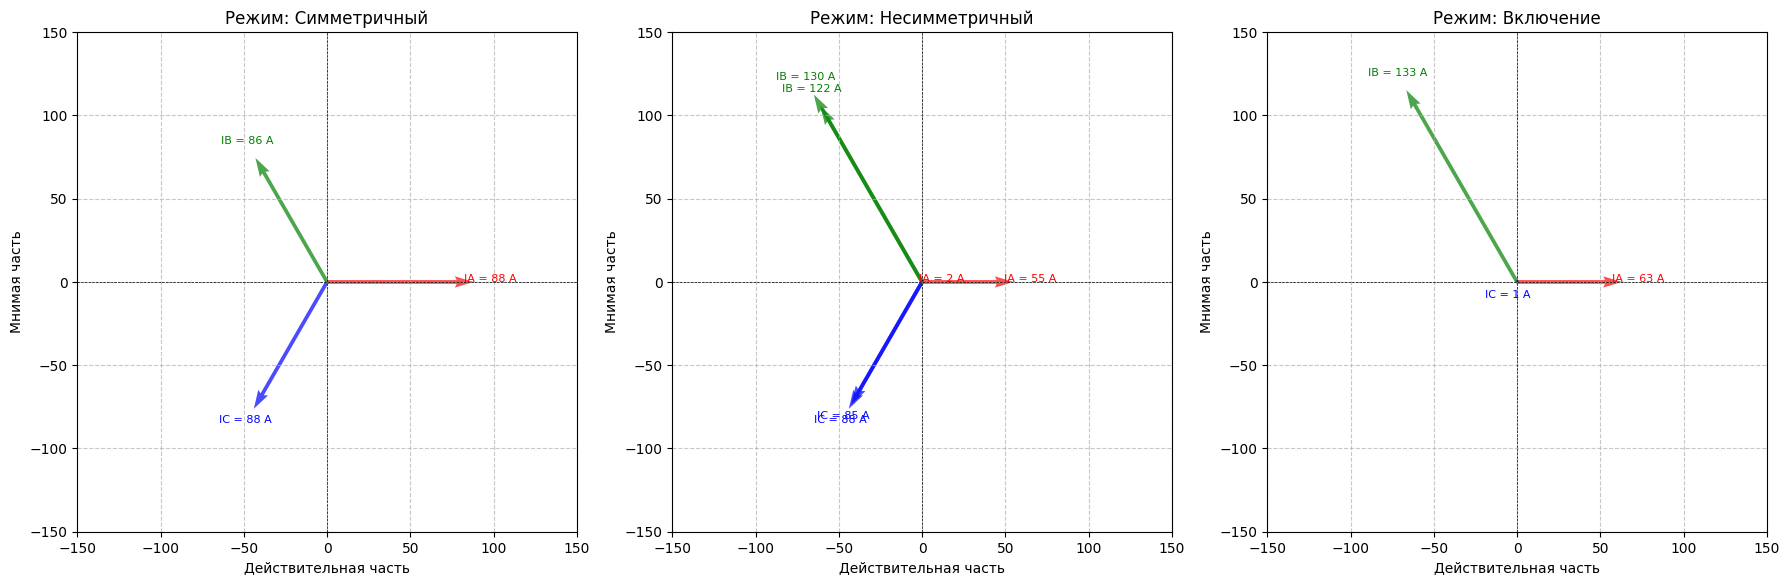

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Данные
data = {
    'Режим работы': ['Симметричный', 'Симметричный', 'Симметричный', 
                     'Несимметричный', 'Несимметричный', 'Несимметричный', 
                     'Несимметричный', 'Несимметричный', 'Несимметричный', 
                     'Включение', 'Включение', 'Включение'],
    'Фаза': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C'],
    'U': [8.78, 8.78, 8.98, 8.78, 8.76, 8.82, 8.68, 8.71, 8.81, 8.89, 8.75, 8.73],
    'I': [88, 86, 88, 2, 122, 85, 55, 130, 88, 63, 133, 1],
    'Angle (°)': [0, 120, 240, 0, 120, 240, 0, 120, 240, 0, 120, 240],
}

# Создаем DataFrame
df = pd.DataFrame(data)

# Создаем фигуру с 3 субплотами
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Цвета для каждой фазы
colors = {'A': 'r', 'B': 'g', 'C': 'b'}

# Функция для построения векторной диаграммы
def plot_vector_diagram(ax, mode_data):
    ax.set_title(f'Режим: {mode_data["Режим работы"].iloc[0]}')
    
    for index, row in mode_data.iterrows():
        angle_rad = np.deg2rad(row['Angle (°)'])
        I_length = row['I']
        
        # Вектор тока
        x = I_length * np.cos(angle_rad)
        y = I_length * np.sin(angle_rad)
        
        ax.quiver(0, 0, x, y,
                  angles='xy', scale_units='xy', scale=1, 
                  color=colors[row['Фаза']], alpha=0.7)
        
        # Смещение текста
        text_offset = 10
        ax.text(x + text_offset * np.cos(angle_rad), 
                y + text_offset * np.sin(angle_rad), 
                f'I{row["Фаза"]} = {I_length} A', 
                fontsize=8, color=colors[row['Фаза']], ha='center')

    ax.set_xlim(-150, 150)
    ax.set_ylim(-150, 150)
    ax.axhline(0, color='black', linewidth=0.5, ls='--')
    ax.axvline(0, color='black', linewidth=0.5, ls='--')
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_xlabel('Действительная часть')
    ax.set_ylabel('Мнимая часть')
    ax.set_aspect('equal', adjustable='box')

# Построение графиков для каждого режима
modes = df['Режим работы'].unique()
plot_vector_diagram(ax1, df[df['Режим работы'] == modes[0]])
plot_vector_diagram(ax2, df[df['Режим работы'] == modes[1]])
plot_vector_diagram(ax3, df[df['Режим работы'] == modes[2]])

plt.tight_layout()
plt.show()

In [15]:
import pandas as pd
import numpy as np

def calculate_power(df, cos_phi=1.0):
    """
    Расчет активной мощности с учетом cos(φ)
    
    Args:
        df (DataFrame): Входные данные
        cos_phi (float): Коэффициент мощности, по умолчанию 1.0
    
    Returns:
        dict: Результаты расчетов
    """
    results = {}
    
    for index, row in df.iterrows():
        mode = row['Режим работы']
        
        # Расчет линейных напряжений и токов
        U_an, U_bn, U_cn = row['Uan'], row['Ubn'], row['Ucn']
        I_a, I_b, I_c = row['Ia'], row['Ib'], row['Ic']
        
        # Расчет активной мощности для каждой фазы с учетом cos(φ)
        P_a = U_an * I_a * cos_phi
        P_b = U_bn * I_b * cos_phi
        P_c = U_cn * I_c * cos_phi
        
        # Суммарная активная мощность
        P_total = P_a + P_b + P_c
        
        # Для симметричного режима проверка формулы
        if mode == 'Симметричный':
            U_line = np.mean([U_an, U_bn, U_cn])
            I_line = np.mean([I_a, I_b, I_c])
            
            # Расчет по формуле P_3φ = √3 * U_n * I_n * cos(φ)
            P_3ph_theory = np.sqrt(3) * U_line * I_line * cos_phi
            
            results[mode] = {
                'Линейное напряжение': U_line,
                'Линейный ток': I_line,
                'Фазные мощности': [P_a, P_b, P_c],
                'Суммарная мощность': P_total,
                'Мощность по теории': P_3ph_theory,
                'cos(φ)': cos_phi
            }
        else:
            results[mode] = {
                'Фазные мощности': [P_a, P_b, P_c],
                'Суммарная мощность': P_total,
                'cos(φ)': cos_phi
            }
    
    return results

# Создание DataFrame
data = {
    'Режим работы': ['Симметричный', 'Несимметричный', 'Несимметричный', 'Включение'],
    "Uan": [8.78, 8.78, 8.68, 8.89],
    "Ubn": [8.78, 8.76, 8.71, 8.75],
    "Ucn": [8.98, 8.82, 8.81, 8.73],
    "Ia": [88, 2, 55, 63],
    "Ib": [86, 122, 130, 133],
    "Ic": [88, 85, 88, 1],
    "In": [1, 104, 61, 114],
}

df = pd.DataFrame(data)

# Варианты расчета с разными cos(φ)
cos_phi_values = [1.0, 0.8, 0.9]

for cos_phi in cos_phi_values:
    print(f"\n--- Расчет с cos(φ) = {cos_phi} ---")
    results = calculate_power(df, cos_phi)
    
    for mode, data in results.items():
        print(f"\nРежим: {mode}")
        print(f"Фазные мощности: {data['Фазные мощности']}")
        print(f"Суммарная мощность: {data['Суммарная мощность']}")
        
        if mode == 'Симметричный':
            print(f"Линейное напряжение: {data['Линейное напряжение']:.2f} В")
            print(f"Линейный ток: {data['Линейный ток']:.2f} А")
            print(f"Мощность по теории: {data['Мощность по теории']:.2f} Вт")


--- Расчет с cos(φ) = 1.0 ---

Режим: Симметричный
Фазные мощности: [772.64, 755.0799999999999, 790.24]
Суммарная мощность: 2317.96
Линейное напряжение: 8.85 В
Линейный ток: 87.33 А
Мощность по теории: 1338.20 Вт

Режим: Несимметричный
Фазные мощности: [477.4, 1132.3000000000002, 775.2800000000001]
Суммарная мощность: 2384.9800000000005

Режим: Включение
Фазные мощности: [560.07, 1163.75, 8.73]
Суммарная мощность: 1732.5500000000002

--- Расчет с cos(φ) = 0.8 ---

Режим: Симметричный
Фазные мощности: [618.1120000000001, 604.064, 632.192]
Суммарная мощность: 1854.368
Линейное напряжение: 8.85 В
Линейный ток: 87.33 А
Мощность по теории: 1070.56 Вт

Режим: Несимметричный
Фазные мощности: [381.92, 905.8400000000001, 620.2240000000002]
Суммарная мощность: 1907.9840000000004

Режим: Включение
Фазные мощности: [448.05600000000004, 931.0, 6.984000000000001]
Суммарная мощность: 1386.04

--- Расчет с cos(φ) = 0.9 ---

Режим: Симметричный
Фазные мощности: [695.376, 679.572, 711.216]
Суммарная мо

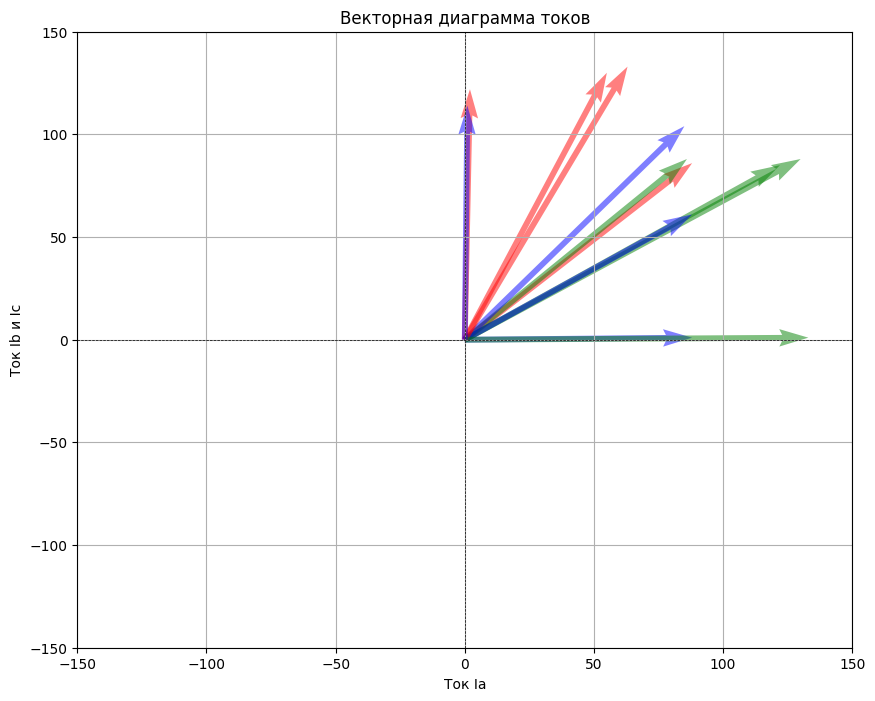

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Данные
data = {
    'Режим работы': ['Симметричный', 'Несимметричный', 'Несимметричный', 'Включение'],
    "Uan": [8.78, 8.78, 8.68, 8.89],
    "Ubn": [8.78, 8.76, 8.71, 8.75],
    "Ucn": [8.98, 8.82, 8.81, 8.73],
    "Ia": [88, 2, 55, 63],
    "Ib": [86, 122, 130, 133],
    "Ic": [88, 85, 88, 1],
    "In": [1, 104, 61, 114],
}

df = pd.DataFrame(data)

# Настройка векторной диаграммы
plt.figure(figsize=(10, 8))

# Углы для векторов токов
angles = np.linspace(0, 2 * np.pi, 4)

# Отображение токов
for i in range(len(df)):
    plt.quiver(0, 0, df['Ia'][i], df['Ib'][i], angles='xy', scale_units='xy', scale=1, color='r', alpha=0.5)
    plt.quiver(0, 0, df['Ib'][i], df['Ic'][i], angles='xy', scale_units='xy', scale=1, color='g', alpha=0.5)
    plt.quiver(0, 0, df['Ic'][i], df['In'][i], angles='xy', scale_units='xy', scale=1, color='b', alpha=0.5)

# Настройка графика
plt.xlim(-150, 150)
plt.ylim(-150, 150)
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.grid()
plt.title('Векторная диаграмма токов')
plt.xlabel('Ток Ia')
plt.ylabel('Ток Ib и Ic')
plt.show()

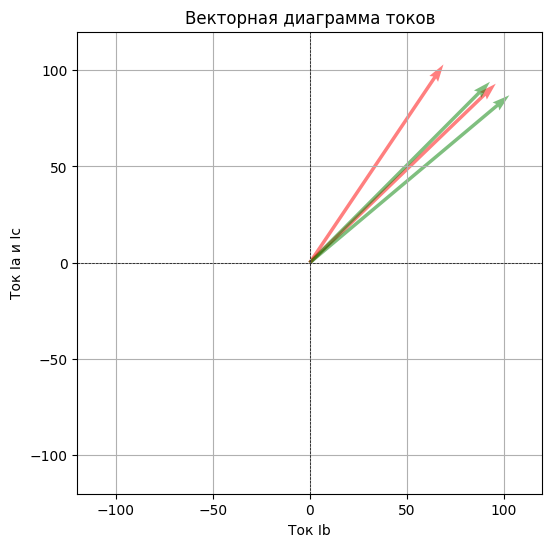

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data_2 = {
    "Режим работы": ['Симметричный', 'Несимметричный'],
    "Uan": [8.78, 8.81],
    "Ubn": [8.77, 8.76],
    "Ucn": [8.79, 8.78],
    "Ia": [96, 69],
    "Ib": [93, 103],
    "Ic": [94, 87],
}

df_2 = pd.DataFrame(data_2)

# Настройка векторной диаграммы
plt.figure(figsize=(6, 6))

# Углы для векторов токов
angles = np.linspace(0, 2 * np.pi, 3)

# Отображение токов
for i in range(len(df_2)):
    plt.quiver(0, 0, df_2['Ia'][i], df_2['Ib'][i], angles='xy', scale_units='xy', scale=1, color='r', alpha=0.5)
    plt.quiver(0, 0, df_2['Ib'][i], df_2['Ic'][i], angles='xy', scale_units='xy', scale=1, color='g', alpha=0.5)

# Настройка графика
plt.xlim(-120, 120)
plt.ylim(-120, 120)
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.grid()
plt.title('Векторная диаграмма токов')
plt.xlabel('Ток Ib')
plt.ylabel('Ток Ia и Ic')
plt.show()

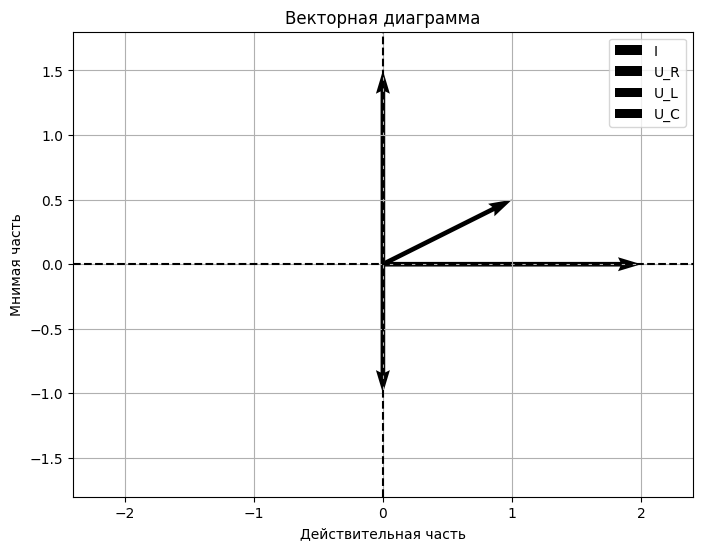

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def plot_vector_diagram(vectors, labels):
    fig, ax = plt.subplots(figsize=(8, 8))
    
    for vector, label in zip(vectors, labels):
        ax.quiver(0, 0, np.real(vector), np.imag(vector), angles='xy', scale_units='xy', scale=1, label=label)
    
    ax.set_xlim([-max(abs(v.real) for v in vectors) * 1.2, max(abs(v.real) for v in vectors) * 1.2])
    ax.set_ylim([-max(abs(v.imag) for v in vectors) * 1.2, max(abs(v.imag) for v in vectors) * 1.2])
    ax.set_xlabel('Действительная часть')
    ax.set_ylabel('Мнимая часть')
    ax.grid(True)
    ax.axhline(y=0, color='k', linestyle='--')
    ax.axvline(x=0, color='k', linestyle='--')
    ax.set_aspect('equal')
    ax.legend()
    plt.title('Векторная диаграмма')
    plt.show()

# Пример использования
I = 1 + 0.5j  # Ток
U_R = 2 + 0j  # Напряжение на резисторе
U_L = 0 + 1.5j  # Напряжение на индуктивности
U_C = 0 - 1j  # Напряжение на емкости

vectors = [I, U_R, U_L, U_C]
labels = ['I', 'U_R', 'U_L', 'U_C']

plot_vector_diagram(vectors, labels)

In [19]:
def plot_current_diagram(df):
    plt.figure(figsize=(10, 6))
    
    for index, row in df.iterrows():
        # Определяем углы для токов
        angles = [0, -120, 120]  # Углы для трехфазного тока
        currents = [row['Ia'], row['Ib'], row['Ic']]
        
        # Преобразуем векторы в комплексные числа
        complex_currents = [curr * np.exp(1j * np.radians(angle)) for curr, angle in zip(currents, angles)]
        
        # Получаем координаты
        real_parts = [c.real for c in complex_currents]
        imag_parts = [c.imag for c in complex_currents]
        
        # Замыкаем контур
        real_parts.append(real_parts[0])
        imag_parts.append(imag_parts[0])
        
        plt.plot(real_parts, imag_parts, marker='o', label=f'Режим {row["Режим работа цепи"]}' if index == 0 else "")
        
        # Добавляем текст
        for i in range(3):
            plt.text(real_parts[i], imag_parts[i], f"I{i+1}: {currents[i]}A", fontsize=12, ha='center')

    plt.title('Векторные диаграммы токов')
    plt.xlabel('Действительная часть (A)')
    plt.ylabel('Мнимая часть (A)')
    plt.axhline(0, color='black',linewidth=0.5, ls='--')
    plt.axvline(0, color='black',linewidth=0.5, ls='--')
    plt.grid()
    plt.legend()
    plt.axis('equal')
    plt.show()

plot_current_diagram(df)

KeyError: 'Режим работа цепи'

<Figure size 1000x600 with 0 Axes>